# Co2 Emission Visualization


In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
import io

Retrieve S3 bucket data

In [74]:
client = boto3.client('s3')
bytes_buffer = io.BytesIO()
response = client.get_object(Bucket='pasarela-testing-data', Key="data/owid-co2-data.csv")

status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")

if status == 200:
    print(f"Successful S3 get_object response.")
    df1 = pd.read_csv(response.get("Body"))
    #data from the year 2020
    df1= df1[df1['year'] == 2020]
else:
    print(f"Unsuccessful S3 get_object response.")

Successful S3 get_object response.


Now, if you want to clean the data and work on your dataset only for a few countries then we will run the below query:

In [77]:
df1 = df1[(df1['country'].isin(['United States','South Korea','Bangladesh','Canada','Germany','Brazil','Argentina','Japan','India','United Kingdom','Saudi Arabia',
'China','Australia','Russia']) & (df1['co2'] > 0))]

#removing all columns except 'country', 'year' and 'co2'
columns_to_keep = ['country', 'year', 'co2']
df1 = df1[[col for col in df1.columns if col in columns_to_keep]]

df1.info(verbose = "true") 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 766 to 24067
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  14 non-null     object 
 1   year     14 non-null     int64  
 2   co2      14 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 448.0+ bytes


We will draw the graph based on our dataset and analyze some results. First, we will draw the pie chart based on the country and Co2 column and see which country has the highest Co2 emission.

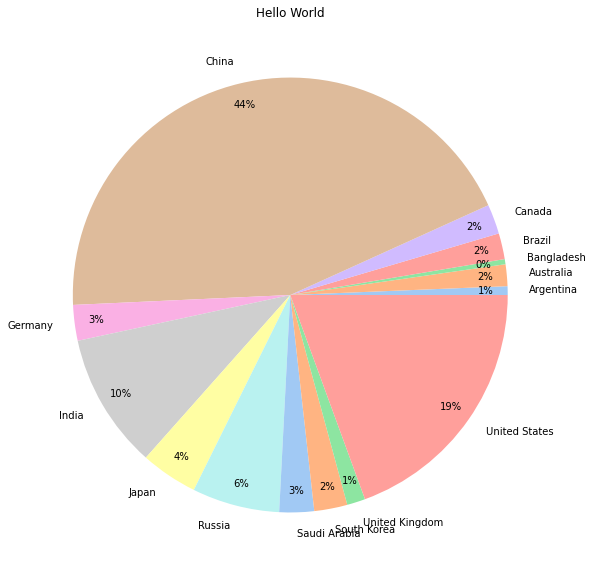

In [76]:
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(df1['co2'], labels= df1['country'], colors = colors,  autopct = '%0.0f%%', pctdistance = .9)
plt.title("CO2 Emissions")
plt.show()
%matplotlib inline

As we can see China is the topmost followed by the United States and then India and so on.

# 